# Compare ASUM threshold and anomaly score:

In [1]:
import os, sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import os.path
from os import listdir
from os import listdir
import glob
import matplotlib.pyplot as plt
from model_validation import model_validation
from sklearn.metrics import accuracy_score
import numpy as np
from prepare_data import data_split
import json
import matplotlib as mpl
from os import listdir
from os.path import isfile, join

In [3]:
file = '/mnt/yggdrasil_scratch/electron_nsbx1/anomaly_data/corsika_run4.simtel.gz_n_events_10000_df.xlsx'

In [2]:
files_puth = '/mnt/yggdrasil_scratch/electron_nsbx1/anomaly_data/'
onlyfiles = [f for f in listdir(files_puth) if isfile(join(files_puth, f))]

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/yggdrasil_scratch/electron_nsbx1/anomaly_data/'

In [3]:
def get_df_data(path):
    asum_list = []
    anomal_list = []
    
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

    for i_file in onlyfiles:
        if i_file.find('.~') != -1:
            print('wrong : ', i_file)
        else:
            print('file : ', i_file)
    
            df_file = pd.read_excel(path + i_file, index_col=0) 
            asum_list.append(list(df_file['asum: max amplitude']))
            anomal_list.append(list(df_file['Anomaly_Score']))
            
    asum_list = np.array(asum_list).flatten(order='C')
    anomal_list = np.array(anomal_list).flatten(order='C')
            
    return asum_list, anomal_list

In [4]:
def get_df_asum_energy(path):
    asum_list = []
    energy_list = []
    
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

    for i_file in onlyfiles:
        if i_file.find('.~') != -1:
            print('wrong : ', i_file)
        else:
            print('file : ', i_file)
    
            df_file = pd.read_excel(path + i_file, index_col=0) 
            asum_list.append(list(df_file['asum: max amplitude']))
            energy_list.append(list(df_file['energy TeV.']))
            
    asum_list = np.array(asum_list).flatten(order='C')
    energy_list = np.array(energy_list).flatten(order='C')
            
    return asum_list, energy_list

In [56]:
path_database_muons = '/mnt/yggdrasil_scratch/muons/anomaly_data/'
asum_tmp, energy_tmp = get_df_asum_energy(path_database_muons)

file :  muon_12.0GeV_2.63_off_axis_184.21_.simtel.gz_n_events_1000_df.xlsx
file :  muon_26.0GeV_1.08_off_axis_268.79_.simtel.gz_n_events_1000_df.xlsx


(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
 array([0.012 , 0.0134, 0.0148, 0.0162, 0.0176, 0.019 , 0.0204, 0.0218,
        0.0232, 0.0246, 0.026 ]),
 <BarContainer object of 10 artists>)

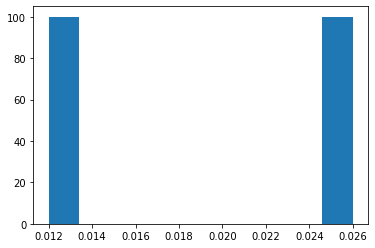

In [58]:
plt.hist(energy_tmp)

In [6]:
gamma_on_asum, gamma_on_anomaly_score = get_df_data('/mnt/yggdrasil_scratch/gamma_on_nsbx1/anomaly_data/')

file :  corsika_run652.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run524.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run633.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run902.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run394.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run133.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run102.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run116.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run965.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run129.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run730.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run317.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run723.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run41.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run831.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run204.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run685.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run197.simtel.gz_n_events_10000_d

In [7]:
gamma_diffuse_asum, gamma_diffuse_anomaly_score = get_df_data('/mnt/yggdrasil_scratch/gamma_diffuse_nsbx1/anomaly_data/')

file :  corsika_run789.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run181.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1454.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1905.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run651.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run508.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1655.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run761.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run970.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1285.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1397.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run10.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run802.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1138.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1870.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1368.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run718.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1065.simtel.gz_n_event

file :  corsika_run710.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1520.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1492.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run702.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1947.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run796.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run794.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1985.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run332.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run580.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run738.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1736.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run630.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run193.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run995.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run187.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run238.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1056.simtel.gz_n_events_

In [8]:
proton_asum, proton_anomaly_score = get_df_data('/mnt/yggdrasil_scratch/proton_nsbx1/anomaly_data/')

file :  corsika_run19.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4234.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1980.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3667.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4505.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run481.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2382.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4836.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2976.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run66.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3898.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3831.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3013.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run551.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1561.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2575.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1985.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4926.simtel.gz_n_e

file :  corsika_run1836.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run505.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3424.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3888.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run118.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3445.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3353.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1795.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1701.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4438.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2081.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2779.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3951.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2309.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2434.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2252.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3580.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2922.simtel.gz

file :  corsika_run3174.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4357.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3815.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3976.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run688.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2762.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3315.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4895.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run640.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2158.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2607.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3993.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4621.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4645.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4340.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4757.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4940.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run151.simtel.gz_

file :  corsika_run2778.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4754.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run129.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1455.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2248.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4947.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2939.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4207.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run4147.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1420.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run2803.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3296.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1962.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1077.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3210.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3081.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run3879.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run708.simtel.gz

In [9]:
electron_asum, electron_anomaly_score = get_df_data('/mnt/yggdrasil_scratch/electron_nsbx1/anomaly_data/')

file :  corsika_run558.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run58.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run308.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1235.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1334.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1732.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run294.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1561.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run316.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run681.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1327.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run982.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1744.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run584.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run662.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1120.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run995.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run741.simtel.gz_n_events_

file :  corsika_run748.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run757.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run836.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run54.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run333.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1308.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run5.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1078.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1194.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1377.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1774.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run656.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1295.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run178.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run340.simtel.gz_n_events_10000_df.xlsx
file :  corsika_run1366.simtel.gz_n_events_10000_df.xlsx
wrong :  .~lock.corsika_run1002.simtel.gz_n_events_10000_df.xlsx#
file :  corsika_run1100.simtel.gz_

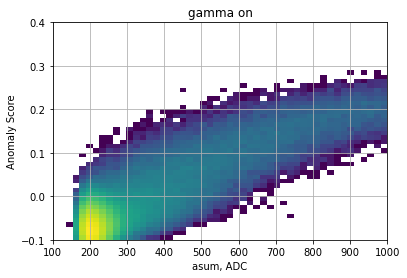

In [10]:
plt.hist2d(gamma_on_asum, gamma_on_anomaly_score, 
           bins = [50, 50], range = [[100, 1000], [-0.1, 0.4]], norm=mpl.colors.LogNorm())
plt.title('gamma on')
plt.xlabel('asum, ADC')
plt.ylabel('Anomaly Score')
plt.grid()
plt.savefig('gamma_on_asum_vs_anomaly_zoom.png', dpi=200)

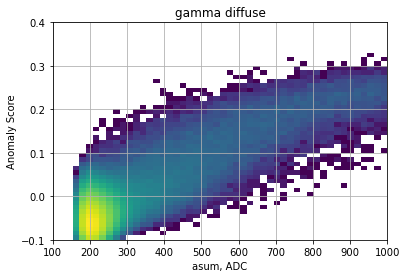

In [11]:
plt.hist2d(gamma_diffuse_asum, gamma_diffuse_anomaly_score, 
           bins = [50, 50], range = [[100, 1000], [-0.1, 0.4]], norm=mpl.colors.LogNorm())
plt.title('gamma diffuse')
plt.xlabel('asum, ADC')
plt.ylabel('Anomaly Score')
plt.grid()
plt.savefig('gamma_diff_asum_vs_anomaly_zoom.png', dpi=200)

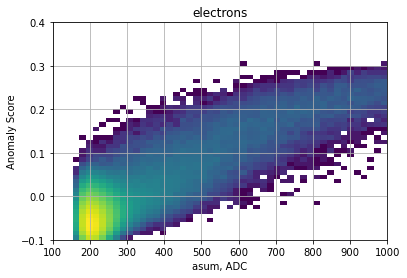

In [12]:
plt.hist2d(electron_asum, electron_anomaly_score, 
           bins = [50, 50], range = [[100, 1000], [-0.1, 0.4]], norm=mpl.colors.LogNorm())
plt.title('electrons')
plt.xlabel('asum, ADC')
plt.ylabel('Anomaly Score')
plt.grid()
plt.savefig('electron_asum_vs_anomaly_zoom.png', dpi=200)

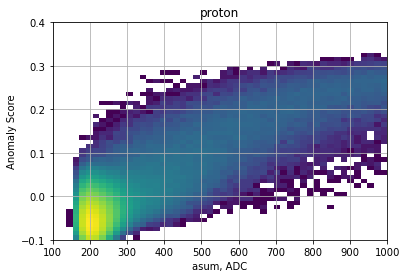

In [13]:
plt.hist2d(proton_asum, proton_anomaly_score, 
           bins = [50, 50], range = [[100, 1000], [-0.1, 0.4]], norm=mpl.colors.LogNorm())
plt.title('proton')
plt.xlabel('asum, ADC')
plt.ylabel('Anomaly Score')
plt.grid()
plt.savefig('proton_asum_vs_anomaly_zoom.png', dpi=200)

In [14]:
asum_all = np.append(proton_asum, electron_asum, axis=0)
asum_all = np.append(asum_all, gamma_diffuse_asum, axis=0)
asum_all = np.append(asum_all, gamma_on_asum, axis=0)

anomaly_score_all = np.append(proton_anomaly_score, electron_anomaly_score, axis=0)
anomaly_score_all = np.append(anomaly_score_all, gamma_diffuse_anomaly_score, axis=0)
anomaly_score_all = np.append(anomaly_score_all, gamma_on_anomaly_score, axis=0)

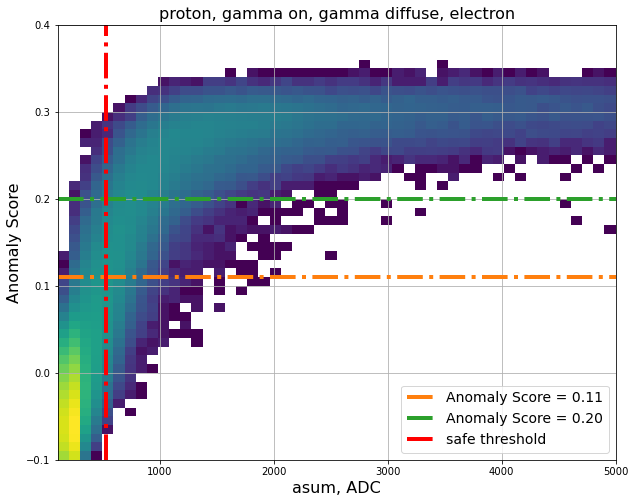

In [20]:
fig, ax0  = plt.subplots(1, figsize=(10,8))

plt.hist2d(asum_all, anomaly_score_all, 
           bins = [50, 50], range = [[100, 5000], [-0.1, 0.4]], norm=mpl.colors.LogNorm())
plt.title('proton, gamma on, gamma diffuse, electron', fontsize=16)
plt.xlabel('asum, ADC', fontsize=16)
plt.ylabel('Anomaly Score', fontsize=16)

an_011 = plt.plot([100, 5000], [0.11, 0.11], '-.', linewidth=4, c = 'tab:orange', label = "Anomaly Score = 0.11")
an_020 = plt.plot([100, 5000], [0.2, 0.2], '-.', linewidth=4, c = 'tab:green', label = "Anomaly Score = 0.20")

plt.grid()
plt.legend(loc=4)

#plot_lines = []
#plot_lines.append([an_011, an_020])
#legend1 = plt.legend(plot_lines[0], ["Anomaly Score = 0.11", "Anomaly Score = 0.20"], loc=1)

#plt.gca().add_artist(legend1)

plt.plot([525.7, 525.7], [-0.1, 0.4], 'r-.', linewidth=4, label='safe threshold')
plt.legend(loc=4, fontsize=14)
#plt.show()

plt.savefig('all_asum_vs_anomaly_zoom.png', dpi=200)

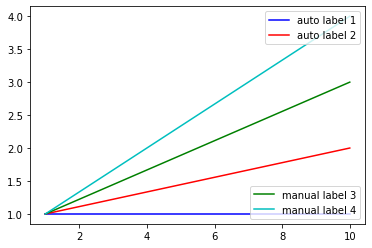

In [35]:
import matplotlib.pyplot as plt

plt.figure()

colors = ['b', 'r', 'g', 'c']
parameters = [1,2,3,4]
for p in parameters:

  color = colors[parameters.index(p)]
  plt.plot([1,10],[1,p], '-', c=color, label='auto label '+str(p))

lines = plt.gca().get_lines()
include = [0,1]
legend1 = plt.legend([lines[i] for i in include],[lines[i].get_label() for i in include], loc=1)
legend2 = plt.legend([lines[i] for i in [2,3]],['manual label 3','manual label 4'], loc=4)
plt.gca().add_artist(legend1)
plt.show()


Text(0, 0.5, 'Anomaly Score')

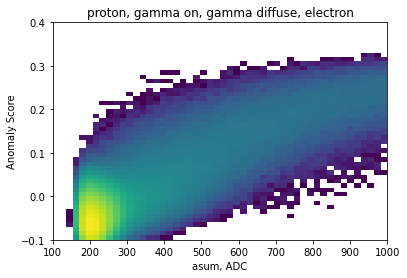

In [37]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist2d(asum_all, anomaly_score_all, 
           bins = [50, 50], range = [[100, 1000], [-0.1, 0.4]], norm=mpl.colors.LogNorm())
plt.title('proton, gamma on, gamma diffuse, electron')
plt.xlabel('asum, ADC')
plt.ylabel('Anomaly Score')

In [43]:
len(proton_asum) + len(electron_asum) + len(gamma_diffuse_asum) + len(gamma_on_asum)

9800000

In [37]:
len(electron_asum)

1960000